In [77]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

## Q2

In [2]:
gold1_BGR = cv2.imread("Gold1.bmp")
gold2_BGR = cv2.imread("Gold2.bmp")

RGB:

In [3]:
# R
gold1_R = np.mean(gold1_BGR[:,:,2])
gold2_R = np.mean(gold2_BGR[:,:,2])
# G
gold1_G = np.mean(gold1_BGR[:,:,1])
gold2_G = np.mean(gold2_BGR[:,:,1])
# B
gold1_B = np.mean(gold1_BGR[:,:,0])
gold2_B = np.mean(gold2_BGR[:,:,0])

print("Gold1.bmp R: {0}, G: {1}, B: {2}".format(gold1_R, gold1_G, gold1_B))
print("Gold2.bmp R: {0}, G: {1}, B: {2}".format(gold2_R, gold2_G, gold1_B))

Gold1.bmp R: 224.0, G: 192.0, B: 64.0
Gold2.bmp R: 211.0, G: 175.0, B: 64.0


HSV:

In [4]:
gold1_HSV = cv2.cvtColor(gold1_BGR, cv2.COLOR_BGR2HSV)
gold2_HSV = cv2.cvtColor(gold2_BGR, cv2.COLOR_BGR2HSV)

# H
gold1_H = np.mean(gold1_HSV[:,:,0])
gold2_H = np.mean(gold2_HSV[:,:,0])

# S 
gold1_S = np.mean(gold1_HSV[:,:,1])
gold2_S = np.mean(gold2_HSV[:,:,1])

print("Gold1.bmp H: {0}, S: {1}".format(gold1_H, gold1_S))
print("Gold2.bmp H: {0}, S: {1}".format(gold2_H, gold2_S))

Gold1.bmp H: 24.0, S: 182.0
Gold2.bmp H: 23.0, S: 189.0


CIE-Lab:

In [5]:
gold1_lab = cv2.cvtColor(gold1_BGR, cv2.COLOR_BGR2Lab)
gold2_lab = cv2.cvtColor(gold2_BGR, cv2.COLOR_BGR2Lab)

# a
gold1_a = np.mean(gold1_lab[:,:,1])
gold2_a = np.mean(gold2_lab[:,:,1])

# b 
gold1_b = np.mean(gold1_lab[:,:,2])
gold2_b = np.mean(gold2_lab[:,:,2])

print("Gold1.bmp a: {0}, b: {1}".format(gold1_a, gold1_b))
print("Gold2.bmp a: {0}, b: {1}".format(gold2_a, gold2_b))

Gold1.bmp a: 126.0, b: 193.0
Gold2.bmp a: 129.0, b: 191.0


## Q3

In [6]:
def hsv_filter(image_name, set_num, hsvp, points):    
    # get relevant points
    points = points.loc[(points["image"] == image_name) & (points["set_num"] == set_num)].copy()
    # get hue/saturation
    hues = hsvp[:,:,0]
    saturations = hsvp[:,:,1]
    points["h"] = hues[points["y"], points["x"]]
    points["s"] = saturations[points["y"], points["x"]]
    
    hmin = points.min()["h"]
    hmax = points.max()["h"]
    smin = points.min()["s"]
    smax = points.max()["s"]
    
    # mask
    hsv_mask = np.zeros_like(hsvp)
    # 1 if hmin <= h <= hmax and smin <= s <= smax, 0 otherwise
    hsv_mask[(hues >= hmin) & (hues <= hmax) & (saturations >= smin) & (saturations <= smax)] = 1
    
    return hsv_mask, hmin, hmax, smin, smax

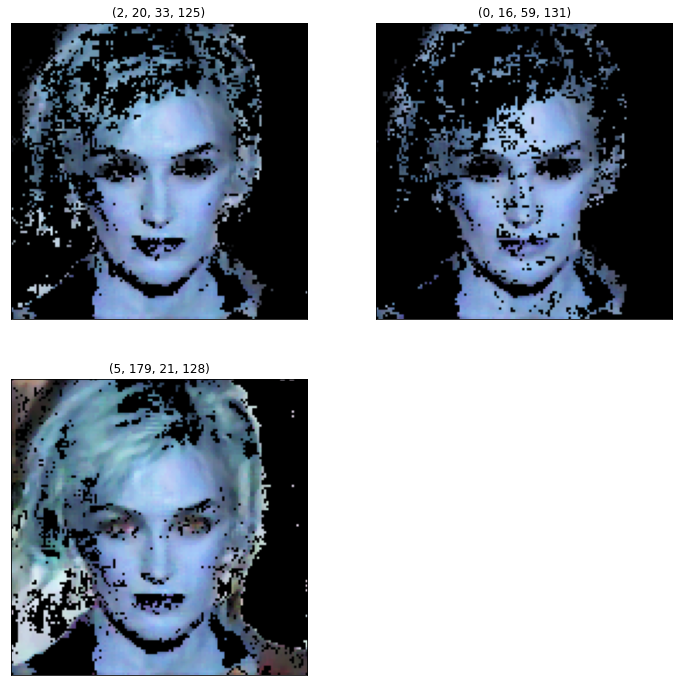

(128, 128, 3)

In [7]:
im_name='m2_samples_563_0.png'
points = pd.read_csv('q3_selected_points_refined.csv')
img = cv2.imread(f"faces/{im_name}")
hsvp = cv2.cvtColor( img , cv2.COLOR_BGR2HSV)

hsv_mask1, hmin1, hmax1, smin1, smax1 = hsv_filter(im_name, 1, hsvp, points)
hsv_mask2, hmin2, hmax2, smin2, smax2 = hsv_filter(im_name, 2, hsvp, points)
hsv_mask3, hmin3, hmax3, smin3, smax3 = hsv_filter(im_name, 3, hsvp, points)
plt.subplots(3,1,figsize=(12,12))
plt.subplot(221),plt.imshow(img*hsv_mask1, cmap='gray')
plt.title(f'{hmin1, hmax1, smin1, smax1}'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img*hsv_mask2, cmap='gray')
plt.title(f'{hmin2, hmax2, smin2, smax2}'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img*hsv_mask3, cmap='gray')
plt.title(f'{hmin3, hmax3, smin3, smax3}'), plt.xticks([]), plt.yticks([])
plt.show()
hsv_mask1.shape

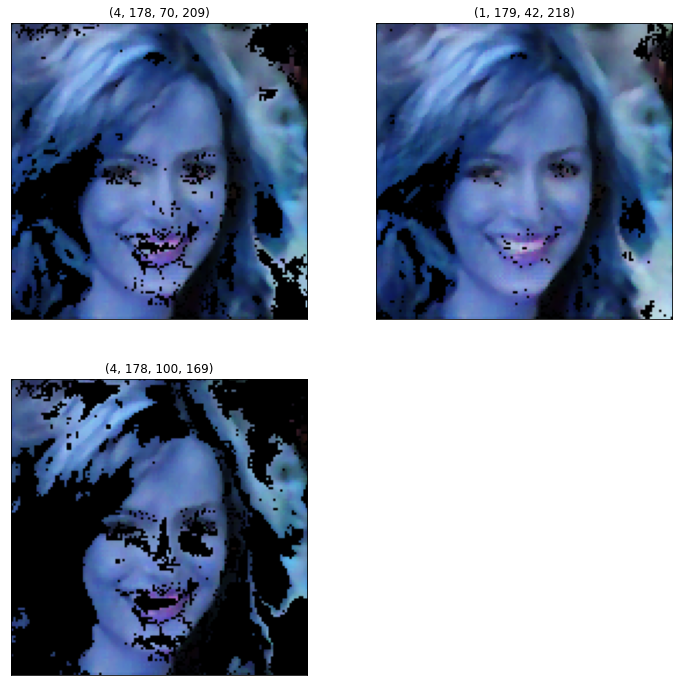

(128, 128, 3)

In [8]:
im_name='m2_samples_615_1.png'
points = pd.read_csv('q3_selected_points_refined.csv')
img = cv2.imread(f"faces/{im_name}")
hsvp = cv2.cvtColor( img , cv2.COLOR_BGR2HSV)

hsv_mask1, hmin1, hmax1, smin1, smax1 = hsv_filter(im_name, 1, hsvp, points)
hsv_mask2, hmin2, hmax2, smin2, smax2 = hsv_filter(im_name, 2, hsvp, points)
hsv_mask3, hmin3, hmax3, smin3, smax3 = hsv_filter(im_name, 3, hsvp, points)
plt.subplots(3,1,figsize=(12,12))
plt.subplot(221),plt.imshow(img*hsv_mask1, cmap='gray')
plt.title(f'{hmin1, hmax1, smin1, smax1}'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img*hsv_mask2, cmap='gray')
plt.title(f'{hmin2, hmax2, smin2, smax2}'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img*hsv_mask3, cmap='gray')
plt.title(f'{hmin3, hmax3, smin3, smax3}'), plt.xticks([]), plt.yticks([])
plt.show()
hsv_mask1.shape

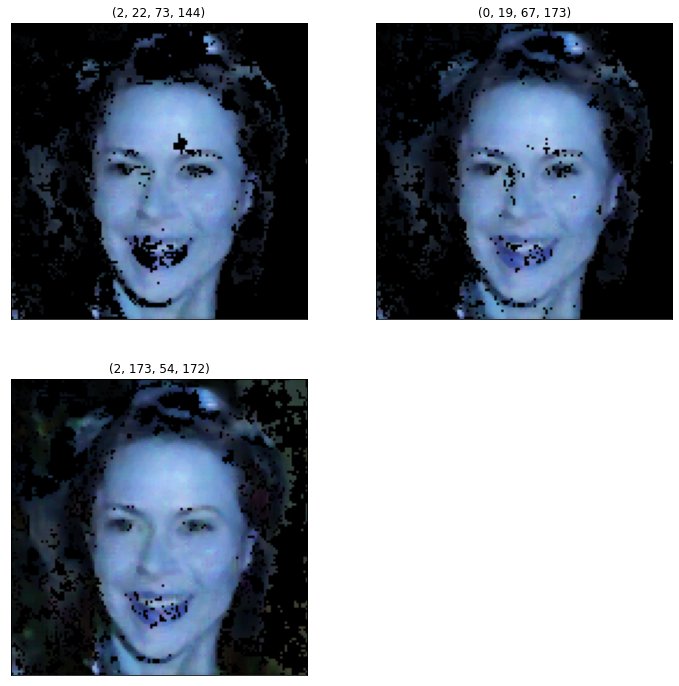

(128, 128, 3)

In [9]:
im_name='m2_samples_565_3.png'
points = pd.read_csv('q3_selected_points_refined.csv')
img = cv2.imread(f"faces/{im_name}")
hsvp = cv2.cvtColor( img , cv2.COLOR_BGR2HSV)

hsv_mask1, hmin1, hmax1, smin1, smax1 = hsv_filter(im_name, 1, hsvp, points)
hsv_mask2, hmin2, hmax2, smin2, smax2 = hsv_filter(im_name, 2, hsvp, points)
hsv_mask3, hmin3, hmax3, smin3, smax3 = hsv_filter(im_name, 3, hsvp, points)
plt.subplots(3,1,figsize=(12,12))
plt.subplot(221),plt.imshow(img*hsv_mask1, cmap='gray')
plt.title(f'{hmin1, hmax1, smin1, smax1}'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img*hsv_mask2, cmap='gray')
plt.title(f'{hmin2, hmax2, smin2, smax2}'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img*hsv_mask3, cmap='gray')
plt.title(f'{hmin3, hmax3, smin3, smax3}'), plt.xticks([]), plt.yticks([])
plt.show()
hsv_mask1.shape

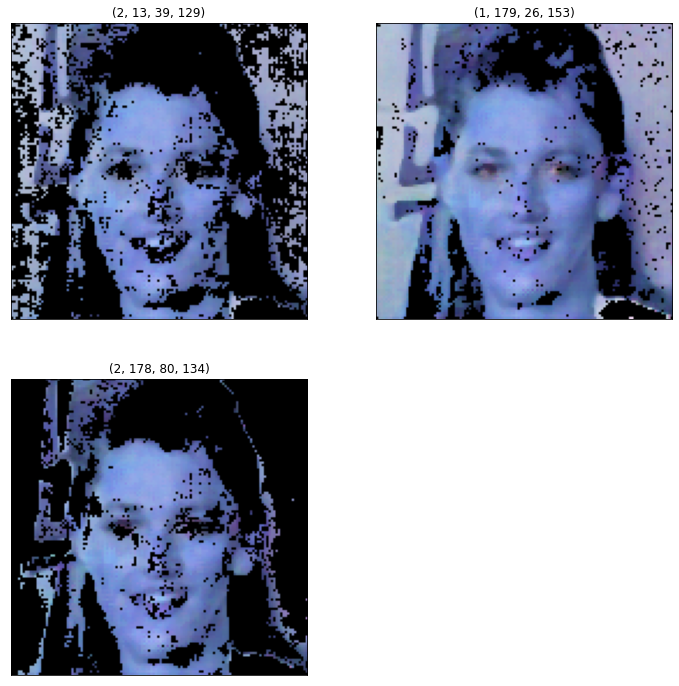

(128, 128, 3)

In [10]:
im_name='m2_samples_533_4.png'
points = pd.read_csv('q3_selected_points_refined.csv')
img = cv2.imread(f"faces/{im_name}")
hsvp = cv2.cvtColor( img , cv2.COLOR_BGR2HSV)

hsv_mask1, hmin1, hmax1, smin1, smax1 = hsv_filter(im_name, 1, hsvp, points)
hsv_mask2, hmin2, hmax2, smin2, smax2 = hsv_filter(im_name, 2, hsvp, points)
hsv_mask3, hmin3, hmax3, smin3, smax3 = hsv_filter(im_name, 3, hsvp, points)
plt.subplots(3,1,figsize=(12,12))
plt.subplot(221),plt.imshow(img*hsv_mask1, cmap='gray')
plt.title(f'{hmin1, hmax1, smin1, smax1}'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img*hsv_mask2, cmap='gray')
plt.title(f'{hmin2, hmax2, smin2, smax2}'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img*hsv_mask3, cmap='gray')
plt.title(f'{hmin3, hmax3, smin3, smax3}'), plt.xticks([]), plt.yticks([])
plt.show()
hsv_mask1.shape

## Q4

In [11]:
def p1_lbp(img, x, y, w):
    center = img[x, y]
    sample = img[x-1:x+2, y-1:y+2]
    threshold = sample >= center
    return np.sum(threshold * w)

def am_power(a):
    pa = 0.0 
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                pa += a[i,j]**2
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                for k in range(dim1[2]):
                    pa += a[i,j,k]**2
    pa = pa / sz
    return pa

def am_lbp(img):
    # weights
    w = np.array([[1, 2, 4], [128, 0, 8], [64, 32, 16]])
    x, y = img.shape
    lbpres = np.zeros_like(img)
    
    for i in range(1, x-1):
        for j in range(1, y-1):
            lbpres[i, j] = p1_lbp(img, i, j, w)
    
    hist1, bins = np.histogram(lbpres.flatten(),255,[0,255])
    pow1 = am_power(img)

    return lbpres, hist1, pow1

In [12]:
img = cv2.imread('Gold1.bmp',0)
lbpres, hist2, pow2 = am_lbp(img)
print('Gold1.bmp')
print(pow2)
print(lbpres[490, 63], hist2[226])
print(lbpres[406, 340], hist2[93])
print(lbpres[273, 569], hist2[46])
print('')


img = cv2.imread('diag_texture.bmp',0)
lbpres, hist2, pow2 = am_lbp(img)
print('diag_texture.bmp')
print(pow2)
print(lbpres[77, 139], hist2[200])
print(lbpres[89, 158], hist2[52])
print(lbpres[234, 133], hist2[17])
print('')

img = cv2.imread('IMG_0054q.jpg',0)
lbpres, hist2, pow2 = am_lbp(img)
print('IMG_0054q.jpg')
print(pow2)
print(lbpres[133, 682], hist2[30])
print(lbpres[62, 218], hist2[244])
print(lbpres[519, 206], hist2[72])
print('')

Gold1.bmp
34969.0
255 0
255 0
255 0

diag_texture.bmp
37562.270306686776
195 145
32 118
147 128

IMG_0054q.jpg
7782.300520790449
9 25399
209 458
30 325



## Q5

In [64]:
def am_glcm(img, GL, d, t):
    # getting distance to next pixel
    x_diff = 0
    y_diff = 0
    if t > 0:
        x_diff = -d
    if t < 90:
        y_diff = d
    if t > 90:
        y_diff = -d
        
    ccmm = np.zeros((GL, GL))
    # count pixel pairs
    M, N = img.shape
    for x1 in range(M):
        for y1 in range(N):
            x2 = x1 + x_diff
            y2 = y1 + y_diff
            if (x2 >= 0) and (x2 < M) and (y2 >= 0) and (y2 < N):
                p1 = img[x1, y1]
                p2 = img[x2, y2]
                ccmm[p1, p2] += 1
    
    return ccmm

In [65]:
def glcm_feat(ccmm):
    mxx = np.max(ccmm)
    enrg = np.sum(ccmm**2)
    inrt = 0
    M, N = ccmm.shape
    for i in range(M):
        for j in range(N):
            inrt += (i - j)**2 * ccmm[i,j]
    return mxx, enrg, inrt

In [74]:
res = []

img = cv2.imread('Gold1.bmp', 0)
ccmm = am_glcm( img , GL=256 , d=1 , t=0)
res.append(ccmm)
print( glcm_feat( ccmm ))
ccmm = am_glcm( img , GL=256 , d=1 , t=90)
res.append(ccmm)
print( glcm_feat( ccmm ))

img = cv2.imread('diag_texture.bmp',0)
ccmm = am_glcm( img , GL=256 , d=1 , t=0)
res.append(ccmm)
print( glcm_feat( ccmm ))
ccmm = am_glcm( img , GL=256 , d=1 , t=90)
res.append(ccmm)
print( glcm_feat( ccmm ))


img = cv2.imread('IMG_0054q.JPG',0)
ccmm = am_glcm( img , GL=256 , d=1 , t=0)
res.append(ccmm)
print( glcm_feat( ccmm ))
ccmm = am_glcm( img , GL=256 , d=1 , t=90)
res.append(ccmm)
print( glcm_feat( ccmm ))

img = cv2.imread('IMG_8636q.JPG',0)
ccmm = am_glcm( img , GL=256 , d=1 , t=0)
res.append(ccmm)
print( glcm_feat( ccmm ))
ccmm = am_glcm( img , GL=256 , d=1 , t=90)
res.append(ccmm)
print( glcm_feat( ccmm ))

(498435.0, 248437449225.0, 0.0)
(498432.0, 248434458624.0, 0.0)
(231.0, 4948261.0, 92608577.0)
(185.0, 4231228.0, 154771429.0)
(833.0, 93259710.0, 86847209.0)
(860.0, 99670970.0, 93357231.0)
(8522.0, 2001138836.0, 508765.0)
(8266.0, 2004537520.0, 492684.0)


In [79]:
with open('q5.pkl', 'wb') as f:
    pkl.dump(res, f)